In [ ]:
## NEED TO INSTALL
# pip install isic-cli 

In [181]:
!isic collection list

If you have been granted special permissions, logging in with `isic user login` might return more data.

┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ ID  ┃ Name                      ┃ Public ┃ Pinned ┃ Locked ┃ DOI             ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 249 │ BCN20000                  │ True   │ False  │ False  │ None            │
│ 61  │ Challenge 2016: Test      │ True   │ True   │ True   │ None            │
│ 74  │ Challenge 2016: Training  │ True   │ True   │ True   │ None            │
│ 69  │ Challenge 2017: Test      │ True   │ True   │ True   │ None            │
│ 60  │ Challenge 2017: Training  │ True   │ True   │ True   │ None            │
│ 71  │ Challenge 2017:           │ True   │ True   │ True   │ None            │
│     │ Validation                │        │        │        │                 │
│ 64  │ Challenge 2018: Task 1-2: │ True   │ True   │ True   │ None            │
│   

In [7]:
!isic metadata download --collections 251

If you have been granted special permissions, logging in with `isic user login` might return more data.

isic_id,attribution,copyright_license,age_approx,anatom_site_general,benign_malignant,concomitant_biopsy,dermoscopic_type,diagnosis,diagnosis_confirm_type,family_hx_mm,fitzpatrick_skin_type,image_type,lesion_id,patient_id,personal_hx_mm,pixels_x,pixels_y,sex
ISIC_6230191,Hospital Italiano de Buenos Aires,CC-BY,25,anterior torso,malignant,True,contact polarized,melanoma,histopathology,,II,dermoscopic,IL_8124990,IP_8542863,True,640,480,male
ISIC_4485929,Hospital Italiano de Buenos Aires,CC-BY,65,anterior torso,benign,False,contact polarized,seborrheic keratosis,,,I,dermoscopic,IL_1921228,IP_9326183,True,2448,2448,female
ISIC_3079785,Hospital Italiano de Buenos Aires,CC-BY,45,lower extremity,benign,True,contact polarized,nevus,histopathology,False,II,dermoscopic,IL_3797557,IP_4906546,False,640,480,male
ISIC_9677008,Hospital Italiano de Buenos Aires,CC-BY,30,posterior torso,malignant,Tr

In [4]:
!pwd

/Users/endothermiic/Desktop/GitHub/APS360_Project


In [5]:
!isic image download --collections 251 TestImages/

If you have been granted special permissions, logging in with `isic user login` might return more data.


Successfully downloaded 1,616 images to TestImages/.
Successfully wrote 1,616 metadata records to TestImages/metadata.csv.
Successfully wrote attributions to TestImages/attribution.txt.
Successfully wrote 1 license(s) to TestImages/licenses.


In [4]:
# open metadata csv file
import csv
with open('metadata.csv','r') as csvfile:
    data = csv.reader(csvfile)

    meta = []
    for row in data:
        meta.append(row)

# visualize data cols
meta[0:3]

[['isic_id',
  'attribution',
  'copyright_license',
  'age_approx',
  'anatom_site_general',
  'benign_malignant',
  'concomitant_biopsy',
  'dermoscopic_type',
  'diagnosis',
  'diagnosis_confirm_type',
  'family_hx_mm',
  'fitzpatrick_skin_type',
  'image_type',
  'lesion_id',
  'patient_id',
  'personal_hx_mm',
  'pixels_x',
  'pixels_y',
  'sex'],
 ['ISIC_6230191',
  'Hospital Italiano de Buenos Aires',
  'CC-BY',
  '25',
  'anterior torso',
  'malignant',
  'True',
  'contact polarized',
  'melanoma',
  'histopathology',
  '',
  'II',
  'dermoscopic',
  'IL_8124990',
  'IP_8542863',
  'True',
  '640',
  '480',
  'male'],
 ['ISIC_4485929',
  'Hospital Italiano de Buenos Aires',
  'CC-BY',
  '65',
  'anterior torso',
  'benign',
  'False',
  'contact polarized',
  'seborrheic keratosis',
  '',
  '',
  'I',
  'dermoscopic',
  'IL_1921228',
  'IP_9326183',
  'True',
  '2448',
  '2448',
  'female']]

In [5]:
import numpy as np
meta = np.array(meta)

In [6]:
# extract image IDs (first column)
img_ids = meta[1:, 0]

In [7]:
img_ids

array(['ISIC_6230191', 'ISIC_4485929', 'ISIC_3079785', ...,
       'ISIC_9314666', 'ISIC_8229835', 'ISIC_7874486'], dtype='<U33')

In [8]:
img_types = meta[1:, 12]

In [9]:
img_types # only want dermoscopic images

array(['dermoscopic', 'dermoscopic', 'dermoscopic', ..., 'dermoscopic',
       'clinical: close-up', 'dermoscopic'], dtype='<U33')

In [10]:
img_diagnoses = meta[1:, 8]

In [11]:
img_diagnoses

array(['melanoma', 'seborrheic keratosis', 'nevus', ...,
       'actinic keratosis', 'basal cell carcinoma',
       'basal cell carcinoma'], dtype='<U33')

In [12]:
diagnosis = {'basal cell carcinoma': 'bcc', 'nevus':'nv', 'melanoma' : 'mel', 'seborrheic keratosis' : 'bkl', 'solar lentigo' : 'bkl'}

In [59]:
# create a new folder for data and navigate to this directory
import os
import shutil
import numpy as np

if not os.path.exists("TestDataset"):
  os.makedirs("TestDataset")

%cd TestDataset

# create a new folder for each class
classes = ['bkl', 'mel', 'nv', 'bcc']
for c in classes:
  os.makedirs(c, exist_ok=True)

In [71]:
# iterate over all images in working directory
for filename in os.listdir('TestImages'):
    filename = filename.removesuffix('.jpg')

    # use the extracted image IDs and match to a corresponding class
    if filename in img_ids:
        i = np.where(img_ids == filename)[0][0]
        if img_diagnoses[i] in diagnosis.keys() and img_types[i] == 'dermoscopic':
          class_name = diagnosis[img_diagnoses[i]]
         # move image to corresponding class folder
          shutil.move('TestImages' + '/' + filename + '.jpg',
                      os.path.join('TestDataset/' + class_name, filename + '.jpg'))

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler as srs
import random
import matplotlib.pyplot as plt
from collections import Counter
import torch.optim as optim
import time
from torch.utils.data import DataLoader


In [182]:
dir = '/Users/endothermiic/Desktop/GitHub/APS360_Project/TestDataset'
transform = transforms.Compose([transforms.ToTensor(),
         transforms.Resize((224, 224)), # images are either 450 * 600 or 1024 * 1024
                                # all resized to 224 * 224 for ResNet
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# transform input images to match requirements; load all images to all_data
all_data = torchvision.datasets.ImageFolder(dir, transform=transform)

In [183]:
all_data

Dataset ImageFolder
    Number of datapoints: 1032
    Root location: /Users/endothermiic/Desktop/GitHub/APS360_Project/TestDataset
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [184]:

# use Dataloader to allow for iteration (img, label) over a dataset
# same method used in previous labs
testing_loader = torch.utils.data.DataLoader(all_data, shuffle=True)

print("There are {0} images in the testing set".format(len(testing_loader)))


There are 1032 images in the testing set


In [185]:
def get_counts(loader):
    # information from dataloader
    labels = [label for img, label in loader.dataset]

    # num / class counted
    counts = dict(Counter(labels))

    return counts

test_counts = get_counts(testing_loader)

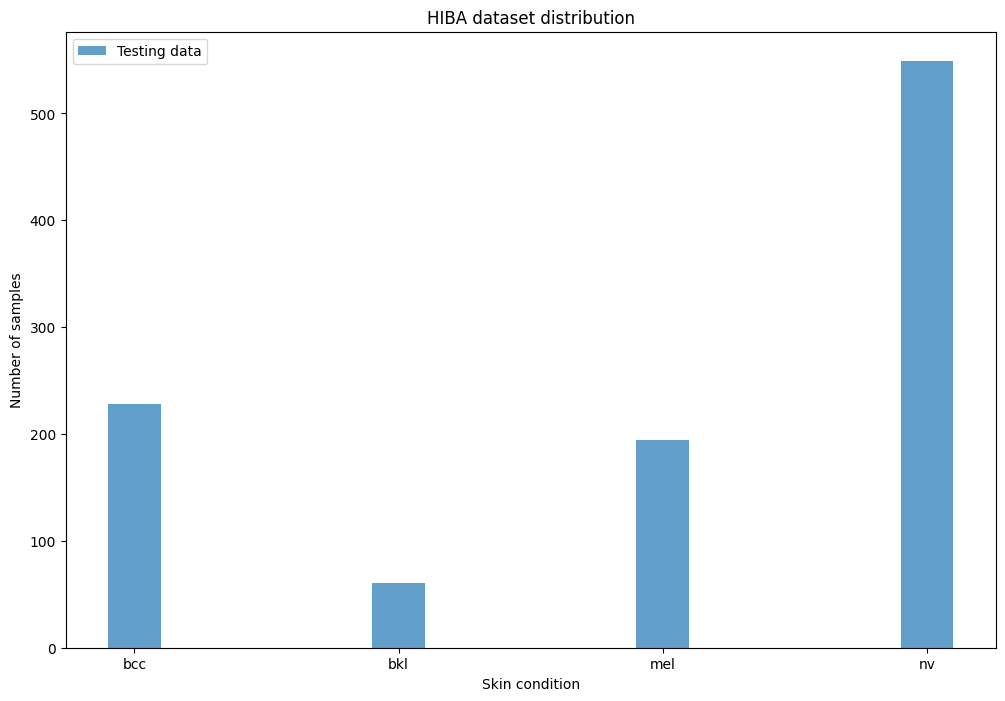

In [186]:
# Pre data augmentation 
labels = ['bcc', 'bkl', 'mel', 'nv']

def plot(test_counts, title):
    conditions = test_counts.keys()

    # train_values = [train_counts.get(c, 0) for c in conditions]
    # val_values = [val_counts.get(c, 0) for c in conditions]
    test_values = [test_counts.get(c, 0) for c in conditions]
    
    x = np.arange(len(conditions))
    width = 0.2 
    
    plt.figure(figsize=(12, 8))
    # plt.bar(x - width, train_values, width, label='Training data', alpha=0.7)
    # plt.bar(x, val_values, width, label='Validation data', alpha=0.7)
    plt.bar(x, test_values, width, label='Testing data', alpha=0.7)
    
    plt.xlabel('Skin condition')
    plt.ylabel('Number of samples')
    plt.title(title)
    plt.xticks(x, labels) # can confirm with swapping out conditions here
    plt.legend()
    
    plt.show()


plot(test_counts, "HIBA dataset distribution")


# Model

In [187]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)


testing_features = []

# Remove the final fully connected layer
model = nn.Sequential(*list(model.children())[:-2])
model.eval()  # Set model to evaluation mode

def get_features(loader, save):
    for imgs, labels in loader:
        with torch.no_grad():
            features = model(imgs)  # Shape: [batch_size, 512, 7, 7]
        save.append([features, labels])

# Example usage with train_loader, val_loader, test_loader
get_features(testing_loader, testing_features)


Using cache found in /Users/endothermiic/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [201]:
class FeatureDataset(torch.utils.data.Dataset):
    def __init__(self, features):
        self.features = features

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature, label = self.features[idx]
        return feature.squeeze(), label

testing_dataset = FeatureDataset(testing_features)

In [189]:
def get_accuracy(model, data, batch_size):
    correct = 0
    total = 0

    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):
        if  torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1,keepdim = True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [190]:
class BasicConv(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride=1, padding=0, dilation=1, groups=1, relu=True, bn=True, bias=False):
        super(BasicConv, self).__init__()
        self.out_channels = out_planes
        self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride, padding=padding, dilation=dilation, groups=groups, bias=bias)
        self.bn = nn.BatchNorm2d(out_planes,eps=1e-5, momentum=0.01, affine=True) if bn else None
        self.relu = nn.ReLU() if relu else None

    def forward(self, x):
        x = self.conv(x)
        if self.bn is not None:
            x = self.bn(x)
        if self.relu is not None:
            x = self.relu(x)
        return x

class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size(0), -1)

class ChannelGate(nn.Module):
    def __init__(self, gate_channels, reduction_ratio=16, pool_types=['avg', 'max']):
        super(ChannelGate, self).__init__()
        self.gate_channels = gate_channels
        self.mlp = nn.Sequential(
            Flatten(),
            nn.Linear(gate_channels, gate_channels // reduction_ratio),
            nn.ReLU(),
            nn.Linear(gate_channels // reduction_ratio, gate_channels)
            )
        self.pool_types = pool_types
    def forward(self, x):
        channel_att_sum = None
        for pool_type in self.pool_types:
            if pool_type=='avg':
                avg_pool = F.avg_pool2d( x, (x.size(2), x.size(3)), stride=(x.size(2), x.size(3)))
                channel_att_raw = self.mlp( avg_pool )
            elif pool_type=='max':
                max_pool = F.max_pool2d( x, (x.size(2), x.size(3)), stride=(x.size(2), x.size(3)))
                channel_att_raw = self.mlp( max_pool )
            elif pool_type=='lp':
                lp_pool = F.lp_pool2d( x, 2, (x.size(2), x.size(3)), stride=(x.size(2), x.size(3)))
                channel_att_raw = self.mlp( lp_pool )
            elif pool_type=='lse':
                # LSE pool only
                lse_pool = logsumexp_2d(x)
                channel_att_raw = self.mlp( lse_pool )

            if channel_att_sum is None:
                channel_att_sum = channel_att_raw
            else:
                channel_att_sum = channel_att_sum + channel_att_raw

        scale = F.sigmoid( channel_att_sum ).unsqueeze(2).unsqueeze(3).expand_as(x)
        return x * scale

def logsumexp_2d(tensor):
    tensor_flatten = tensor.view(tensor.size(0), tensor.size(1), -1)
    s, _ = torch.max(tensor_flatten, dim=2, keepdim=True)
    outputs = s + (tensor_flatten - s).exp().sum(dim=2, keepdim=True).log()
    return outputs

class ChannelPool(nn.Module):
    def forward(self, x):
        return torch.cat( (torch.max(x,1)[0].unsqueeze(1), torch.mean(x,1).unsqueeze(1)), dim=1 )

class SpatialGate(nn.Module):
    def __init__(self):
        super(SpatialGate, self).__init__()
        kernel_size = 7
        self.compress = ChannelPool()
        self.spatial = BasicConv(2, 1, kernel_size, stride=1, padding=(kernel_size-1) // 2, relu=False)
    def forward(self, x):
        x_compress = self.compress(x)
        x_out = self.spatial(x_compress)
        scale = F.sigmoid(x_out) # broadcasting
        return x * scale

class CBAM(nn.Module):
    def __init__(self, gate_channels, reduction_ratio=16, pool_types=['avg', 'max'], no_spatial=False):
        super(CBAM, self).__init__()
        self.ChannelGate = ChannelGate(gate_channels, reduction_ratio, pool_types)
        self.no_spatial=no_spatial
        if not no_spatial:
            self.SpatialGate = SpatialGate()
    def forward(self, x):
        x_out = self.ChannelGate(x)
        if not self.no_spatial:
            x_out = self.SpatialGate(x_out)
        return x_out

In [191]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.name = "cnn"
        # Input shape [128, 512, 7, 7] == [batch size, channels, feature map width, fm height]
        self.conv1 = nn.Conv2d(512, 256, 5, padding=1)  # Output: [batch, 128, 7, 7]
        self.pool = nn.MaxPool2d(2, 2)  # Pooling layer : 256 * 4 * 4
        self.bn1 = nn.BatchNorm2d(256)
        self.cbam1 = CBAM(256)
        
        self.conv2 = nn.Conv2d(256, 64, 5, padding=1)  # Output: [batch, 128, 4, 4]
        self.bn2 = nn.BatchNorm2d(64)
        self.cbam2 = CBAM(64)
        
        self.dropout = nn.Dropout(0.6)

        self.fc = nn.Linear(576, 4)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.cbam1(x)
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.cbam2(x)
        
     
        x = self.dropout(x)
        
        x = x.view(x.size(0), -1)  # Flatten the feature maps
        x = F.relu(self.fc(x)) # Fully connected layer
        return x
        

In [192]:
testing_model = CNNClassifier()

In [193]:
checkpoint = torch.load("ModelSave/best_model", map_location=torch.device('cpu'))
testing_model.load_state_dict(checkpoint)

<All keys matched successfully>

In [194]:
get_accuracy(testing_model, testing_dataset, 64)

0.6056201550387597

# Confusion matrix

In [202]:
testing_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=64, shuffle=False)

In [203]:
import torch
import numpy as np

# Lists to store true labels and predictions
testing_labels = []
testing_preds = []

# Disable gradient calculation
with torch.no_grad():
    for inputs, labels in torch.utils.data.DataLoader(testing_dataset, batch_size=64):  # Assuming test_loader yields (inputs, labels)
        
        # Forward pass
        outputs = testing_model(inputs)
        
        # Get the predicted class (for classification)
        _, preds = torch.max(outputs, 1)
        
        # Append true labels and predictions
        testing_labels.extend(labels.numpy())
        testing_preds.extend(preds.numpy())

# Convert lists to numpy arrays
y_true = np.array(testing_labels)
y_pred = np.array(testing_preds)


In [204]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

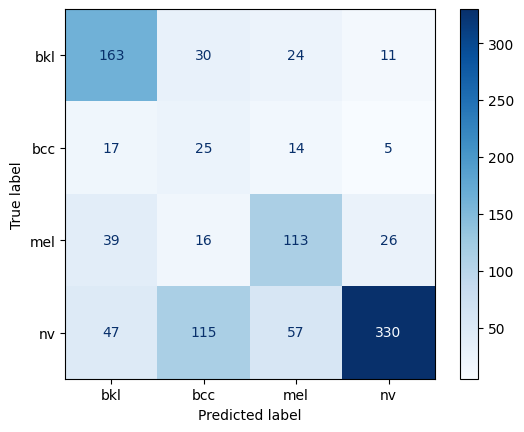

In [205]:
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bkl', 'bcc', 'mel', 'nv'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Precision, Recall

In [206]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

classes = ['bcc', 'bkl', 'mel', 'nv']

precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

print("\nUsing sklearn's precision_score and recall_score:")
for i in range(4):
    print(f'{classes[i]} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}')


Using sklearn's precision_score and recall_score:
bcc - Precision: 0.61, Recall: 0.71
bkl - Precision: 0.13, Recall: 0.41
mel - Precision: 0.54, Recall: 0.58
nv - Precision: 0.89, Recall: 0.60


# Sample predictions